In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

```8. Load the MNIST data (introduced in Chapter 3), and split it into a training set,a validation set, and a test set (e.g., use 50,000 instances for training, 10,000
for validation, and 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM classifier.
Next, try to combine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found
one, try it on the test set. How much better does it perform compared to the individual classifiers?
#-----------------------------------------------------------------------------------------------#
9. Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting
predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. 
Train a classifier on this new training set. Congratulations, you have just trained a  blender, and together with the classifiers it forms a stacking ensemble! Now
evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to
get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier?```

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist["data"], mnist["target"]

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

(-0.5, 27.5, 27.5, -0.5)

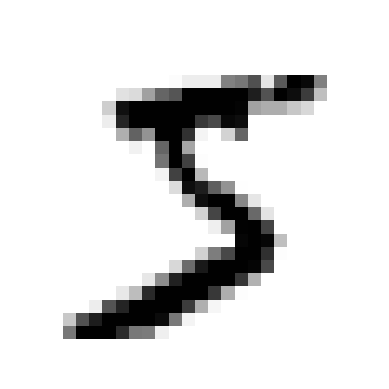

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X.loc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")


In [5]:
 y = y.astype(np.uint8)

In [6]:
X_train = X[:50000]
X_test  = X[50000:60000]
X_val   = X[60000:]

y_train = y[:50000]
y_test  = y[50000:60000]
y_val   = y[60000:]

In [7]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)
y_val_5   = (y_val   == 5)

In [8]:
print(f"Train shape: {X_train.shape, y_train.shape}")
print(f"Test shape : {X_test.shape,   y_test.shape}")
print(f"valid shape: {X_val.shape,   y_val.shape}")

Train shape: ((50000, 784), (50000,))
Test shape : ((10000, 784), (10000,))
valid shape: ((10000, 784), (10000,))


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score

In [10]:
xgb = XGBClassifier()
xgb_scores = cross_val_score(xgb, X_train, y_train_5, cv=3, scoring="accuracy")
xgb_scores.mean()

0.9932799783941918

In [11]:
lgb = LGBMClassifier()
lgb_scores = cross_val_score(lgb, X_train, y_train_5, cv=3, scoring="accuracy")
lgb_scores.mean()

[LightGBM] [Info] Number of positive: 3004, number of negative: 30329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102790
[LightGBM] [Info] Number of data points in the train set: 33333, number of used features: 616
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090121 -> initscore=-2.312160
[LightGBM] [Info] Start training from score -2.312160
[LightGBM] [Info] Number of positive: 3004, number of negative: 30329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.206773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102880
[LightGBM] [Info] Number of data points in the train set: 33333, number of used features: 614
[LightGBM] [In

0.9919999739930798

In [12]:
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train_5, cv=3, scoring="accuracy")
rf_scores.mean()

0.9864199751886398

In [13]:
extr = ExtraTreesClassifier()
extr_scores = cross_val_score(extr, X_train, y_train_5, cv=3, scoring="accuracy")
extr_scores.mean()

0.9886999859906798

In [14]:
lin_svc = LinearSVC()
lin_svc_scores = cross_val_score(lin_svc, X_train, y_train_5, cv=3, scoring="accuracy")
lin_svc_scores.mean()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9543602107677035

In [15]:
svc = SVC()
svc_scores = cross_val_score(svc, X_train, y_train_5, cv=3, scoring="accuracy")
svc_scores.mean()

0.9933199811942798

In [16]:
xgb_scores

array([0.9948401 , 0.99280014, 0.99219969])

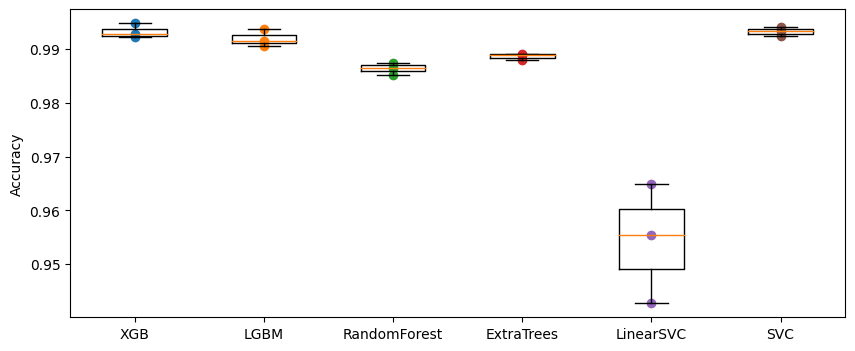

In [17]:
plt.figure(figsize=(10, 4))
plt.plot([1]*3, xgb_scores,  ".",markersize=12)
plt.plot([2]*3, lgb_scores,  ".",markersize=12)
plt.plot([3]*3, rf_scores,   ".",markersize=12)
plt.plot([4]*3, extr_scores, ".",markersize=12)
plt.plot([5]*3, lin_svc_scores, ".",markersize=12)
plt.plot([6]*3, svc_scores, ".",markersize=12)
plt.boxplot([xgb_scores, lgb_scores, rf_scores, extr_scores, lin_svc_scores, svc_scores], labels=("XGB","LGBM", "RandomForest", "ExtraTrees", "LinearSVC", "SVC"))
plt.ylabel("Accuracy", fontsize=10)
plt.show()